In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

## 2. Portfolio Allocation

In [5]:
data = pd.read_excel('midterm_1_data.xlsx', sheet_name=0)

In [32]:
insample = data[data['date'] <= '2018-12-31']
outsample = data[data['date'] > '2018-12-31']

In [33]:
mean_returns = insample.select_dtypes(include=np.number).mean().values
cov_matrix = insample.select_dtypes(include=np.number).cov().values
n_assets = mean_returns.shape[0]
ones = np.ones(n_assets)

## Traditional Tangency Portfolio
inv_cov_matrix = np.linalg.inv(cov_matrix)
weights = inv_cov_matrix @ mean_returns
weights = weights / (weights @ ones)

weights

array([-0.12783639, -0.04057608,  0.1313329 ,  0.02596806,  0.13040776,
       -0.01392883,  0.35267044,  0.03054057,  0.13791739,  0.16350106,
        0.03006613,  0.29022983,  0.30620939, -0.41650224])

In [35]:
# Create a regularized covariance matrix by halving all off-diagonal elements
reg_cov_matrix = cov_matrix.copy()
for i in range(n_assets):
    for j in range(n_assets):
        if i != j:
            reg_cov_matrix[i, j] = reg_cov_matrix[i, j] / 2

# Regularized tangency portfolio weights
inv_reg_cov_matrix = np.linalg.inv(reg_cov_matrix)
reg_weights = inv_reg_cov_matrix @ mean_returns
reg_weights = reg_weights / (reg_weights @ ones)

reg_weights


array([-0.01470633,  0.03630996,  0.10916195,  0.05054455,  0.09919031,
        0.05369143,  0.21494889,  0.03489638,  0.08996958,  0.07169577,
        0.03651137,  0.1898452 ,  0.18455796, -0.15661703])

In [36]:
traditional_abs_sum = np.sum(np.abs(weights))
regularized_abs_sum = np.sum(np.abs(reg_weights))
traditional_abs_sum, regularized_abs_sum

(2.1976870785297886, 1.3426467125901393)

In [44]:
# Calculate annualized mean returns, volatility, and Sharpe ratios for both portfolios (traditional and regularized)
# Assume 12 periods per year for annualization
periods_per_year = 12

# Compute realized (in-sample) returns from data (portfolio returns)
returns = insample.select_dtypes(include=np.number).values

# Traditional portfolio
trad_portf_ret = returns @ weights
trad_ann_mean = trad_portf_ret.mean() * periods_per_year
trad_ann_vol = trad_portf_ret.std(ddof=1) * (periods_per_year ** 0.5)
trad_sharpe = trad_ann_mean / trad_ann_vol

# Regularized portfolio
reg_portf_ret = returns @ reg_weights
reg_ann_mean = reg_portf_ret.mean() * periods_per_year
reg_ann_vol = reg_portf_ret.std(ddof=1) * (periods_per_year ** 0.5)
reg_sharpe = reg_ann_mean / reg_ann_vol

# Return results in a dataframe
import pandas as pd

results_df = pd.DataFrame({
    "Annualized Mean Return": [trad_ann_mean, reg_ann_mean],
    "Annualized Volatility": [trad_ann_vol, reg_ann_vol],
    "Sharpe Ratio": [trad_sharpe, reg_sharpe]
}, index=["Traditional", "Regularized"])

results_df


,Annualized Mean Return,Annualized Volatility,Sharpe Ratio
Traditional,0.348256,0.134053,2.597896
Regularized,0.276599,0.114184,2.422392


In [45]:
# Use the weights calculated in question (2.2) to produce portfolio returns out-of-sample
# for both the Traditional and Regularized portfolio (from January 2019 onwards).
# Report the last 3 returns of both portfolios in the out-of-sample (the traditional tangency portfolio and the regularized tangency portfolio)
# in a DataFrame.

# Compute out-of-sample returns for both portfolios
out_sample_returns = outsample.select_dtypes(include=np.number).values
traditional_oos_returns = out_sample_returns @ weights
regularized_oos_returns = out_sample_returns @ reg_weights

# Put the last 3 out-of-sample returns into a DataFrame
import pandas as pd

last_3_df = pd.DataFrame({
    "Traditional": traditional_oos_returns[-3:],
    "Regularized": regularized_oos_returns[-3:]
}, index=["Return_-3", "Return_-2", "Return_-1"])

last_3_df


,Traditional,Regularized
Return_-3,-0.016012,0.003227
Return_-2,0.101241,0.064626
Return_-1,-0.025162,-0.016477


In [ ]:
# Report the annualized summary statistics (Mean, Vol, and Sharpe) of both portfolios in the out-of-sample.

# Compute out-of-sample portfolio returns
trad_oos_portf_ret = out_sample_returns @ weights
reg_oos_portf_ret = out_sample_returns @ reg_weights

# Annualized statistics
trad_oos_mean = trad_oos_portf_ret.mean() * periods_per_year
trad_oos_vol = trad_oos_portf_ret.std(ddof=1) * (periods_per_year ** 0.5)
trad_oos_sharpe = trad_oos_mean / trad_oos_vol

reg_oos_mean = reg_oos_portf_ret.mean() * periods_per_year
reg_oos_vol = reg_oos_portf_ret.std(ddof=1) * (periods_per_year ** 0.5)
reg_oos_sharpe = reg_oos_mean / reg_oos_vol

oos_results = pd.DataFrame({
    "Annualized Mean Return": [trad_oos_mean, reg_oos_mean],
    "Annualized Volatility": [trad_oos_vol, reg_oos_vol],
    "Sharpe Ratio": [trad_oos_sharpe, reg_oos_sharpe]
}, index=["Traditional", "Regularized"])

oos_results

,Annualized Mean Return,Annualized Volatility,Sharpe Ratio
Traditional,0.321558,0.222352,1.446167
Regularized,0.268686,0.176334,1.523729


In [48]:
# Compare and interpret the risk-adjusted performance of the two portfolios in the out-of-sample period

print("Out-of-sample Annualized Summary Statistics:")
display(oos_results)

better_portfolio = "Traditional" if oos_results.loc["Traditional", "Sharpe Ratio"] > oos_results.loc["Regularized", "Sharpe Ratio"] else "Regularized"
print(f"\nThe {better_portfolio} portfolio has the higher out-of-sample Sharpe Ratio, meaning it achieved better risk-adjusted returns in the out-of-sample period.")

print("\nInterpretation:")
print("A higher Sharpe Ratio indicates better risk-adjusted performance. The difference in Sharpe ratios between the traditional and regularized portfolios could be due to the regularization technique, which generally shrinks portfolio weights closer to zero or distributes more evenly. This reduces the exposure to estimation error and can help control risk, but might also reduce exposure to high-return assets, potentially lowering mean returns.")
print("As observed in (2.2), the sum of absolute weights is lower for the regularized portfolio, indicating less leverage and less extreme positions. This usually results in lower volatility but may also reduce returns if the true optimal weights are far from zero.")
print("Ultimately, regularization tends to trade off some potential return for more stable risk characteristics, which may or may not lead to a higher Sharpe ratio, depending on the data and estimation error present.")


Out-of-sample Annualized Summary Statistics:


,Annualized Mean Return,Annualized Volatility,Sharpe Ratio
Traditional,0.321558,0.222352,1.446167
Regularized,0.268686,0.176334,1.523729



The Regularized portfolio has the higher out-of-sample Sharpe Ratio, meaning it achieved better risk-adjusted returns in the out-of-sample period.

Interpretation:
A higher Sharpe Ratio indicates better risk-adjusted performance. The difference in Sharpe ratios between the traditional and regularized portfolios could be due to the regularization technique, which generally shrinks portfolio weights closer to zero or distributes more evenly. This reduces the exposure to estimation error and can help control risk, but might also reduce exposure to high-return assets, potentially lowering mean returns.
As observed in (2.2), the sum of absolute weights is lower for the regularized portfolio, indicating less leverage and less extreme positions. This usually results in lower volatility but may also reduce returns if the true optimal weights are far from zero.
Ultimately, regularization tends to trade off some potential return for more stable risk characteristics, which may or may not lead to

## 3. Hedging and Replication

In [49]:
data = pd.read_excel('midterm_1_data.xlsx', sheet_name=1)

0     2011-08-31
1     2011-09-30
2     2011-10-31
3     2011-11-30
4     2011-12-31
         ...    
153   2024-05-31
154   2024-06-30
155   2024-07-31
156   2024-08-31
157   2024-09-30
Name: date, Length: 158, dtype: datetime64[ns]

In [63]:
data

,date,HDG US Equity,QAI US Equity,SPY US Equity,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity,SPXU US Equity,UPRO US Equity
0,2011-08-31,-0.027036,-0.006489,-0.054976,-0.092549,-0.087549,-0.005889,-0.088913,0.056476,-0.210854
1,2011-09-30,-0.032466,-0.022141,-0.069420,-0.179063,-0.108082,0.142180,-0.111505,0.190006,-0.207003
2,2011-10-31,0.050531,0.025239,0.109147,0.162986,0.096274,-0.069502,0.151011,-0.298828,0.326066
3,2011-11-30,-0.028608,-0.007964,-0.004064,-0.019724,-0.021765,0.054627,-0.003784,-0.035515,-0.033502
4,2011-12-31,0.012875,0.001822,0.010449,-0.042649,-0.021744,0.075581,0.005144,-0.051986,0.022939
...,...,...,...,...,...,...,...,...,...,...
153,2024-05-31,0.011225,0.013480,0.050580,0.019517,0.050603,-0.028355,0.050383,-0.125918,0.142834
154,2024-06-30,-0.001986,0.003188,0.035280,0.026176,-0.018270,0.032101,-0.011243,-0.087119,0.098225
155,2024-07-31,0.024381,0.011279,0.012109,0.008453,0.025916,-0.016610,0.103356,-0.026368,0.018089
156,2024-08-31,-0.002413,0.007648,0.023365,0.009779,0.032603,-0.035513,-0.016885,-0.068428,0.050748


In [64]:
import statsmodels.api as sm

# Assume 'HDG' is the first column, and the ETFs are the remaining columns
y = data['HDG US Equity']  # HDG returns
X = data[['QAI US Equity', 'SPY US Equity', 'EEM US Equity', 'UPRO US Equity', 'SPXU US Equity', 'IWM US Equity', 'EFA US Equity']]
X = sm.add_constant(X)  # add intercept

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          HDG US Equity   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           3.99e-76
Time:                        14:12:46   Log-Likelihood:                 614.19
No. Observations:                 158   AIC:                            -1212.
Df Residuals:                     150   BIC:                            -1188.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0010      0.001     -1.

In [65]:
# What dollar position would we be taking in each ETF to hedge the HDG position?
# Let's assume we want to hedge $1 invested in HDG with a linear combination of the ETFs.
# The hedge ratios are given by the OLS regression coefficients (excluding the intercept).

hedge_coeffs = model.params.drop('const')  # ETF exposures for 1 unit of HDG

# Calculate dollar position for a generic $1 exposure to HDG
print("Hedge dollar position in each ETF for a $1 long position in HDG:")
for etf, weight in hedge_coeffs.items():
    print(f"{etf}: {weight:+.4f} dollars per $1 of HDG position")

# If you want to hedge an actual position, e.g., $10,000 long HDG:
hdg_exposure = 1000000  # Change this to your actual HDG position
hedge_positions = -hedge_coeffs * hdg_exposure

print(f"\nFor a ${hdg_exposure:,.0f} position in HDG, take the following dollar positions in the ETFs to hedge:")
for etf, pos in hedge_positions.items():
    print(f"{etf}: {pos:+.2f}")



Hedge dollar position in each ETF for a $1 long position in HDG:
QAI US Equity: +0.1515 dollars per $1 of HDG position
SPY US Equity: +0.5154 dollars per $1 of HDG position
EEM US Equity: +0.0448 dollars per $1 of HDG position
UPRO US Equity: -0.1402 dollars per $1 of HDG position
SPXU US Equity: +0.0327 dollars per $1 of HDG position
IWM US Equity: +0.1390 dollars per $1 of HDG position
EFA US Equity: +0.1170 dollars per $1 of HDG position

For a $1,000,000 position in HDG, take the following dollar positions in the ETFs to hedge:
QAI US Equity: -151537.45
SPY US Equity: -515376.35
EEM US Equity: -44816.29
UPRO US Equity: +140222.47
SPXU US Equity: -32654.03
IWM US Equity: -139036.21
EFA US Equity: -117000.29


In [72]:
# Compute and print gross notional and R-squared of the hedge

# Gross notional of the hedge: sum of absolute values of hedge weights per $1 HDG position
gross_notional = model.params.abs().sum()
print(f"\nGross notional of the hedge per $1 HDG position: {gross_notional:.4f}")
print(gross_notional*1000000)

# R-squared of the hedge regression
r_squared = model.rsquared
print(f"R-squared of the hedge regression: {r_squared:.4f}")

# Practical interpretation:
print("\nInterpretation:")
print(f"- Gross notional: Tells us how much total ETF exposure (sum of long and short) is required to hedge $1 of HDG. Lower is more efficient.")
print(f"- R-squared: Tells us how much of HDG's return variance is explained by the ETF linear combination. Closer to 1 is a better hedge.")



Gross notional of the hedge per $1 HDG position: 1.1417
1141653.0029635436
R-squared of the hedge regression: 0.9129

Interpretation:
- Gross notional: Tells us how much total ETF exposure (sum of long and short) is required to hedge $1 of HDG. Lower is more efficient.
- R-squared: Tells us how much of HDG's return variance is explained by the ETF linear combination. Closer to 1 is a better hedge.


In [73]:
model.rsquared

0.9128835765562017

In [75]:
# We want to regress HDG on QAI, SPY, and EEM *without* an intercept, per the specified model:
# HDG_t = β1*QAI_t + β2*SPY_t + β3*EEM_t + ε_t

import statsmodels.api as sm

# Prepare the data
X_basket = data[['QAI US Equity', 'SPY US Equity', 'EEM US Equity']]
y_hdg = data['HDG US Equity']

# Run OLS regression with no intercept (so fit_intercept=False)
basket_model = sm.OLS(y_hdg, X_basket).fit()

# Report the beta values
print("Basket Betas (no intercept):")
for etf, beta in basket_model.params.items():
    print(f"{etf}: {beta:+.6f}")

# Create the basket portfolio returns using the estimated betas
basket_returns = (
    basket_model.params['QAI US Equity'] * data['QAI US Equity'] +
    basket_model.params['SPY US Equity'] * data['SPY US Equity'] +
    basket_model.params['EEM US Equity'] * data['EEM US Equity']
)

# Report the final three (most recent) basket values, compared to HDG
print("\nLast 3 basket portfolio values vs HDG:")
result = data[['date', 'HDG US Equity']].copy()
result['Basket'] = basket_returns
print(result.tail(3).to_string(index=False))


Basket Betas (no intercept):
QAI US Equity: +0.356368
SPY US Equity: +0.162696
EEM US Equity: +0.086523

Last 3 basket portfolio values vs HDG:
      date  HDG US Equity   Basket
2024-07-31       0.024381 0.006721
2024-08-31      -0.002413 0.007373
2024-09-30       0.007448 0.013569


In [ ]:
# Strategy: if residual (epsilon_t) <= 0, go long 200% HDG and short 100% basket NEXT period;
#           if residual > 0, long 200% basket and short 100% HDG NEXT period.
#           We form the PnL series for this strategy and compute annualized mean/vol/sharpe.

# 1. Compute residuals (epsilon_t)
hdg_actual = data['HDG US Equity']
hdg_predicted = basket_returns
epsilon = hdg_actual - hdg_predicted

# 2. Shift signal fwd by 1 to avoid lookahead bias (signal at t impacts weights at t+1)
signal = epsilon.shift(1)

# 3. Build portfolio returns each period depending on signal
# Rule: if signal <=0: r = 2*HDG - 1*Basket; if signal>0: r = 2*Basket - 1*HDG
portfolio_return = (
    ((signal <= 0).astype(float)) * (2 * hdg_actual - 1 * basket_returns) +
    ((signal > 0).astype(float)) * (2 * basket_returns - 1 * hdg_actual)
)

# 4. Drop 1st row (start at second row due to lag)
portfolio_return = portfolio_return.iloc[1:]

# 5. Compute annualized stats
mean_return = portfolio_return.mean() * 12
vol_return = portfolio_return.std() * (12**0.5)
sharpe_ratio = mean_return / vol_return

# 6. Display results
import pandas as pd
results = pd.DataFrame({
    'Annualized Mean Return': [mean_return],
    'Annualized Volatility': [vol_return],
    'Sharpe Ratio': [sharpe_ratio]
})
print("\nAnnualized Performance of Residual Trading Strategy (Long/Short):")
print(results.to_string(index=False))


Annualized Performance of Residual Trading Strategy (Long/Short):
 Annualized Mean Return  Annualized Volatility  Sharpe Ratio
               0.036796               0.062243      0.591156


In [78]:
# Replication analysis of QAI using other ETFs

import numpy as np

# 1. List of columns (assets excluding QAI and date)
exclude_cols = ['date', 'QAI US Equity']
X_cols = [col for col in data.columns if col not in exclude_cols]
y_col = 'QAI US Equity'

X = data[X_cols].values
y = data[y_col].values

# Add intercept
X_design = np.column_stack([np.ones(len(X)), X])

# Regression fit
coef, resid, rank, s = np.linalg.lstsq(X_design, y, rcond=None)
alpha = coef[0]
betas = coef[1:]

# Predicted/fitted values
y_hat = X_design @ coef

# 2. Sum of absolute value of betas
sum_abs_betas = np.abs(betas).sum()

# 3. R^2
ss_tot = ((y - y.mean()) ** 2).sum()
ss_res = ((y - y_hat) ** 2).sum()
r2 = 1 - ss_res / ss_tot

# 4. Information Ratio = alpha / std of residuals (annualized using sqrt(12))
residuals = y - y_hat
residual_std = residuals.std() * np.sqrt(12)
annualized_alpha = alpha * 12
info_ratio = annualized_alpha / residual_std

# 5. Correlation matrix among replicator assets
corr_matrix = np.corrcoef(data[X_cols].values.T)
corr_df = pd.DataFrame(corr_matrix, index=X_cols, columns=X_cols)

# Print results
print("Replication regression results for QAI (using intercept):\n")
for col, b in zip(X_cols, betas):
    print(f"  Beta for {col}: {b:.6f}")
print(f"Sum of absolute betas: {sum_abs_betas:.6f}")
print(f"\nAlpha: {alpha:.6f} (annualized: {annualized_alpha:.6f})")
print(f"Information Ratio: {info_ratio:.6f}")
print(f"R^2: {r2:.6f}")

print("\nCorrelation matrix between assets used to replicate QAI:")
print(corr_df.round(3).to_string())


Replication regression results for QAI (using intercept):

  Beta for HDG US Equity: 0.231451
  Beta for SPY US Equity: 0.565072
  Beta for EEM US Equity: 0.047792
  Beta for EFA US Equity: 0.032642
  Beta for EUO US Equity: -0.020484
  Beta for IWM US Equity: -0.000157
  Beta for SPXU US Equity: 0.051074
  Beta for UPRO US Equity: -0.095099
Sum of absolute betas: 1.043771

Alpha: -0.000525 (annualized: -0.006296)
Information Ratio: -0.317734
R^2: 0.841988

Correlation matrix between assets used to replicate QAI:
                HDG US Equity  SPY US Equity  EEM US Equity  EFA US Equity  EUO US Equity  IWM US Equity  SPXU US Equity  UPRO US Equity
HDG US Equity           1.000          0.874          0.801          0.895         -0.419          0.895          -0.815           0.873
SPY US Equity           0.874          1.000          0.708          0.865         -0.382          0.868          -0.956           0.996
EEM US Equity           0.801          0.708          1.000          0

## 4. VAR Analysis

In [92]:
data = pd.read_excel('midterm_1_data.xlsx', sheet_name=2)
data = data[['date', 'JPY']].set_index('date')

In [93]:
# Calculate the 1% (one-sided left tail) empirical VaR for JPY returns at each point in time (using data up to that month)
# and report the VaR for the final date of the sample.

# Drop missing values if any
returns = data['JPY'].dropna()

# Rolling quantile: for each index, get 1st percentile of ALL returns up to & including that time
empirical_VaR = returns.expanding().quantile(0.01)

# Report the VaR for final date in the sample
print(empirical_VaR.iloc[-1])

-0.01717837630807654


In [96]:
# Calculate rolling volatility (sigma_t) with window=233, mean assumed 0, i.e., sqrt(mean of squared returns)
window = 233
squared_returns = returns ** 2
# rolling(window, min_periods=window) means we only compute for full windows
rolling_var = squared_returns.rolling(window=window, min_periods=window).mean()
rolling_vol = rolling_var ** 0.5

# Compute Normal VaR (1%) = -2.33 * sigma_t
normal_VaR = -2.33 * rolling_vol

# Get VaR for the final 3 days of the sample
final_VaRs = normal_VaR.iloc[-3:]

print("Normal VaR (1%) for the final 3 days of the sample:")
print(final_VaRs)


Normal VaR (1%) for the final 3 days of the sample:
date
2024-08-01   -0.013359
2024-08-02   -0.013631
2024-08-05   -0.013820
Name: JPY, dtype: float64


In [ ]:
# Calculate EWMA volatility with lambda = 0.94 and Normal VaR (1%) for JPY

lambda_ = 0.94
rets = returns.values  # convert to numpy for speed
ewma_vol = []
vol_squared = rets[0]**2  # start at first obs squared for initial variance
ewma_vol.append(vol_squared**0.5)

for r in rets[1:]:
    vol_squared = lambda_ * vol_squared + (1 - lambda_) * r**2
    ewma_vol.append(vol_squared**0.5)

ewma_vol = pd.Series(ewma_vol, index=returns.index)

# Normal VaR (1%) = -2.33 * sigma_t, where sigma_t is ewma_vol (no mean assumed)
ewma_normal_VaR = -2.33 * ewma_vol

# Get VaR for the final 3 days of the sample
print("EWMA Normal VaR (1%) for the final 3 days of the sample:")
print(ewma_normal_VaR.iloc[-3:])


EWMA Normal VaR (1%) for the final 3 days of the sample:
date
2024-08-01   -0.017430
2024-08-02   -0.020140
2024-08-05   -0.021567
dtype: float64


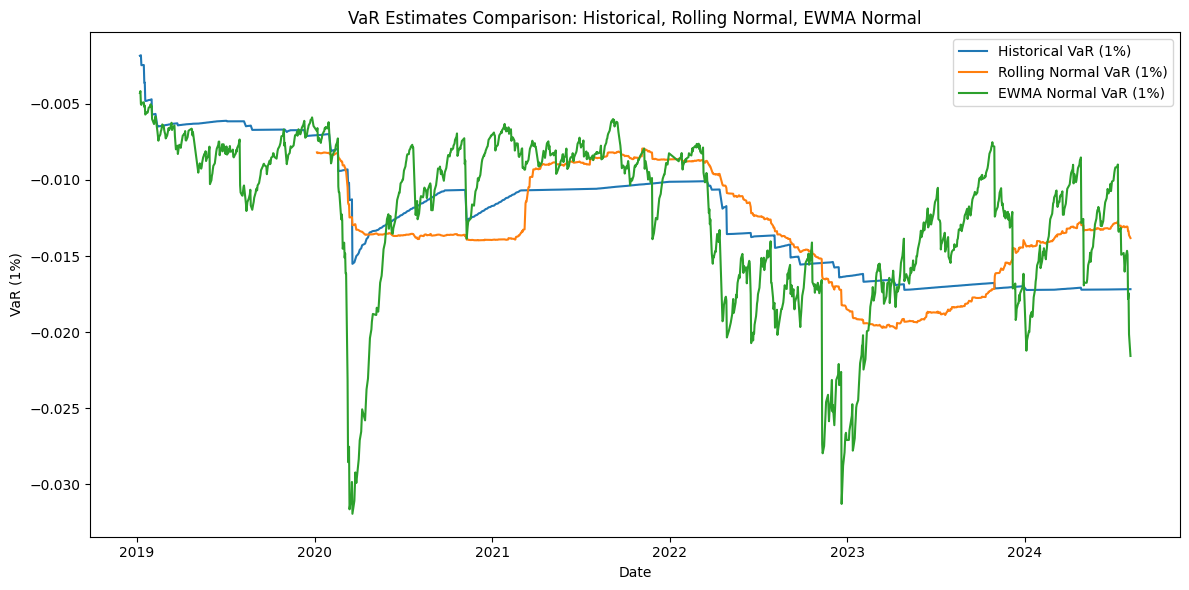

In [104]:
# Plot the three time series of VaR estimates: historical (empirical_VaR), rolling volatility normal_VaR, and EWMA normal VaR

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(empirical_VaR.index, empirical_VaR, label="Historical VaR (1%)")
plt.plot(normal_VaR.index, normal_VaR, label="Rolling Normal VaR (1%)")
plt.plot(ewma_normal_VaR.index, ewma_normal_VaR, label="EWMA Normal VaR (1%)")
plt.xlabel("Date")
plt.ylabel("VaR (1%)")
plt.title("VaR Estimates Comparison: Historical, Rolling Normal, EWMA Normal")
plt.legend()
plt.tight_layout()
plt.show()


In [116]:
# Shift VaR estimates by 1 day to avoid look-ahead bias: today's return is compared to *yesterday's* VaR estimate.
# - empirical_VaR: Series of historical VaR (indexed by date)
# - normal_VaR: Series of rolling volatility VaR (indexed by date)
# - ewma_normal_VaR: Series of EWMA VaR (indexed by date)
# - returns: Series of JPY returns (indexed by date, aligned with VaR series)

# Shift all VaR series forward by 1 so today's VaR is from information available up to yesterday
combined_df = pd.DataFrame({
    'Return': returns,
    'Historical_VaR': empirical_VaR.shift(2),
    'Rolling_Normal_VaR': normal_VaR.shift(2),
    'EWMA_Normal_VaR': ewma_normal_VaR.shift(2)
}).dropna()

# For VaR at 1%, a "hit" (VaR violation) occurs when actual return < VaR
combined_df['Hit_Historical'] = (combined_df['Return'] < combined_df['Historical_VaR']).astype(int)
combined_df['Hit_Rolling_Normal'] = (combined_df['Return'] < combined_df['Rolling_Normal_VaR']).astype(int)
combined_df['Hit_EWMA_Normal'] = (combined_df['Return'] < combined_df['EWMA_Normal_VaR']).astype(int)

# Calculate hit ratio for each model (number of hits / total observations)
hit_ratio_historical = combined_df['Hit_Historical'].mean()
hit_ratio_rolling = combined_df['Hit_Rolling_Normal'].mean()
hit_ratio_ewma = combined_df['Hit_EWMA_Normal'].mean()

# Display as table for comparison
hit_ratio_table = pd.DataFrame({
    "Model": ["Historical VaR (1%)", "Rolling Normal VaR (1%)", "EWMA Normal VaR (1%)"],
    "Hit Ratio": [hit_ratio_historical, hit_ratio_rolling, hit_ratio_ewma]
}).set_index('Model')

print("\nVaR 1% Hit Ratios (proportion of days when return < previous day's VaR):\n")
print(hit_ratio_table)



VaR 1% Hit Ratios (proportion of days when return < previous day's VaR):

                         Hit Ratio
Model                             
Historical VaR (1%)       0.020542
Rolling Normal VaR (1%)   0.025210
EWMA Normal VaR (1%)      0.022409


In [118]:
combined_df[['Hit_Historical', 'Hit_Rolling_Normal', 'Hit_EWMA_Normal']].sum()

Hit_Historical        22
Hit_Rolling_Normal    27
Hit_EWMA_Normal       24
dtype: int64